In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
iris = datasets.load_iris()
x = iris.data
y = iris.target
x.shape
y.shape

(150,)

In [11]:
x = x[y<2,:2]
y = y[y<2]

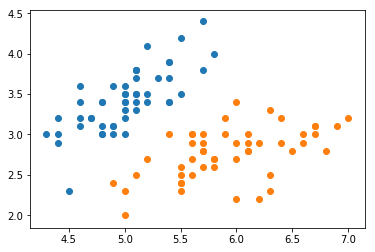

In [12]:
plt.scatter(x[y==0,0],x[y==0,1])
plt.scatter(x[y==1,0],x[y==1,1])
plt.show()

In [13]:
from sklearn.svm import LinearSVC

In [39]:
stand = StandardScaler()
stand.fit(x)
x_standerd = stand.transform(x)
svr = LinearSVC(C=0.1)
svr.fit(x_standerd,y)

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [40]:
svr.coef_


array([[ 0.89242448, -0.74178429]])

In [41]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)



d:\python\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


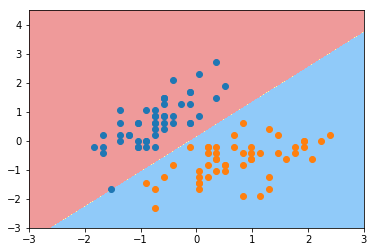

In [42]:
plot_decision_boundary(svr, axis = [-3,3,-3,4.5])
plt.scatter(x_standerd[y==0,0],x_standerd[y==0,1])
plt.scatter(x_standerd[y==1,0],x_standerd[y==1,1])

In [43]:
svr.coef_[:,0]


array([0.89242448])

In [44]:
svr.intercept_


array([0.09160337])

In [45]:
x1 = np.linspace(-3,3,100)
y0 = -(svr.coef_[:,0]*x1 + svr.intercept_)/svr.coef_[:,1]
y1 = (1-svr.coef_[:,0]*x1 - svr.intercept_)/svr.coef_[:,1]
y2 = -(1+svr.coef_[:,0]*x1 + svr.intercept_)/svr.coef_[:,1]
svr.coef_

array([[ 0.89242448, -0.74178429]])

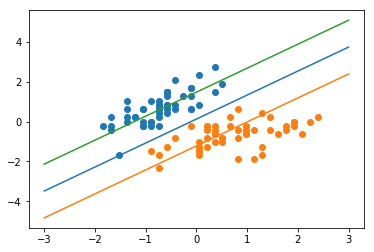

In [46]:
# plot_decision_boundary(svr,axis=[-3, 3, -3, 3])
plt.plot(x1,y0)
plt.plot(x1,y1)
plt.plot(x1,y2)
plt.scatter(x_standerd[y==0,0],x_standerd[y==0,1])
plt.scatter(x_standerd[y==1,0],x_standerd[y==1,1])
plt.show()

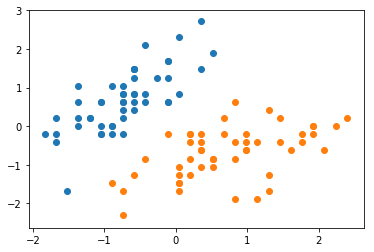

In [47]:
stand = StandardScaler()
stand.fit(x)
x_standerd = stand.transform(x)
plt.scatter(x_standerd[y==0,0],x_standerd[y==0,1])
plt.scatter(x_standerd[y==1,0],x_standerd[y==1,1])
plt.show()